<a href="https://colab.research.google.com/github/fredixus/Python/blob/DS/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.python.keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt



In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

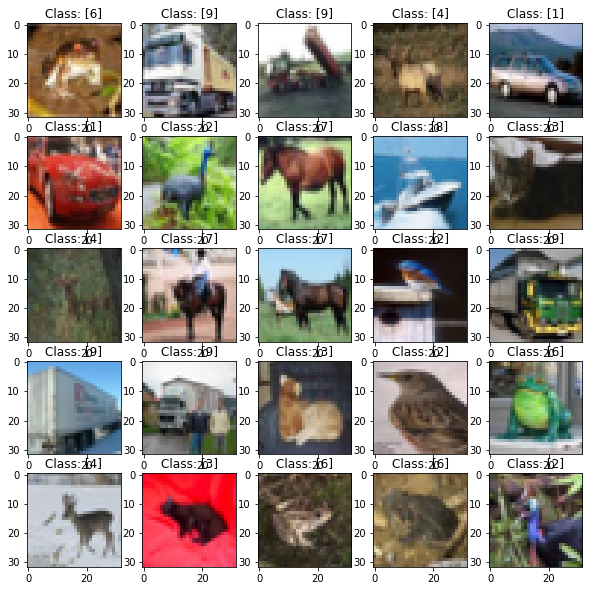

In [3]:
plt.figure(figsize=(10,10))

for idx in range(25):
    plt.subplot(5,5, idx+1)
    plt.imshow(X_train[idx], cmap= 'gray')
    plt.title('Class: {}'.format(y_train[idx]))

In [4]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(-1, img_rows, img_cols, num_channels)
X_test = X_test.reshape(-1, img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [6]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [0]:
if len(y_train.shape)==2:
   y_train = y_train.reshape(-1)
   y_test = y_test.reshape(-1)

if len(y_train.shape)==1:
    num_classes = len(set(y_train))
    #num_classes = 10
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [8]:
y_train.shape, y_test.shape,num_classes

((50000, 10), (10000, 10), 10)

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),    

    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25), 
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')
    
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [14]:
os.environ['COLAB_TPU_ADDR']


NameError: ignored

In [21]:
model.fit(X_train,y_train,
          batch_size=256, epochs=10, verbose=2,
          validation_data=(X_test,y_test)
)

10000/10000 [==============================] - 1s 134us/step


[0.6920792282104492, 0.7628]

In [0]:
model.evaluate(X_test, y_test)